In [1]:
import numpy as np
import requests
import json
import apikey
from requests.auth import HTTPBasicAuth
import matplotlib.pyplot as plt

import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
from folium import plugins
from folium.plugins import HeatMap

In [2]:
#smart campus api key
headers = {
    'Content-type': 'application/json', 
    'Authorization': f'{apikey.APIKEY}',
}

In [3]:
# Set the API endpoint and request all devices
url = 'https://query-api.rahtiapp.fi/events'
devices = []

# Send the API request
response = requests.get(url, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the sensor data
    sensor_data = response.iter_lines()
    print(sensor_data)
else:
    print("Error: API request failed with status code", response.status_code)


<generator object Response.iter_lines at 0x000002804487BC40>


In [4]:
devices = []
devicesInFloorOne = []

#loop through all devices API gave
    
for line in response.iter_lines(decode_unicode=True):
    print(line)
    devices.append(json.loads(line))



[{"time":"2023-03-28T00:00:01.785Z","temperature":20.6,"humidity":11,"light":5,"motion":0,"co2":434,"battery":3.671,"deveui":"a8-17-58-ff-fe-03-0f-9f","deveui_1":"a8-17-58-ff-fe-03-0f-9f"},{"time":"2023-03-28T00:00:02.940Z","temperature":19.1,"humidity":12,"light":1,"motion":0,"co2":368,"battery":3.675,"deveui":"a8-17-58-ff-fe-03-10-30","deveui_1":"a8-17-58-ff-fe-03-10-30"},{"time":"2023-03-28T00:00:03.127Z","temperature":21,"humidity":12,"light":1,"motion":0,"co2":562,"battery":3.692,"deveui":"a8-17-58-ff-fe-03-0f-7a","deveui_1":"a8-17-58-ff-fe-03-0f-7a"},{"time":"2023-03-28T00:00:05.663Z","temperature":21.4,"humidity":10,"light":21,"motion":0,"co2":490,"battery":3.678,"deveui":"a8-17-58-ff-fe-03-10-21","deveui_1":"a8-17-58-ff-fe-03-10-21"},{"time":"2023-03-28T00:00:11.593Z","temperature":19.5,"humidity":15,"light":1,"motion":68,"co2":null,"battery":3.57,"deveui":"a8-17-58-ff-fe-04-63-b2","deveui_1":"a8-17-58-ff-fe-04-63-b2"},{"time":"2023-03-28T00:00:18.548Z","temperature":12.3,"humi

In [5]:
devices[0][0]

{'time': '2023-03-28T00:00:01.785Z',
 'temperature': 20.6,
 'humidity': 11,
 'light': 5,
 'motion': 0,
 'co2': 434,
 'battery': 3.671,
 'deveui': 'a8-17-58-ff-fe-03-0f-9f',
 'deveui_1': 'a8-17-58-ff-fe-03-0f-9f'}

In [6]:
# Complete ISO-8601 date format // 2015-03-04T00:00:00.000Z // 
devices[0][0]["time"]

'2023-03-28T00:00:01.785Z'

In [7]:
device_id_list = [device["deveui"] for device in devices[0]]

# 210 devices
device_id_list

['a8-17-58-ff-fe-03-0f-9f',
 'a8-17-58-ff-fe-03-10-30',
 'a8-17-58-ff-fe-03-0f-7a',
 'a8-17-58-ff-fe-03-10-21',
 'a8-17-58-ff-fe-04-63-b2',
 'a8-17-58-ff-fe-03-10-8d',
 'a8-17-58-ff-fe-03-0f-bd',
 'a8-17-58-ff-fe-03-10-1d',
 'a8-17-58-ff-fe-03-0f-b9',
 'a8-17-58-ff-fe-04-1f-ee',
 'a8-17-58-ff-fe-03-10-91',
 'a8-17-58-ff-fe-04-63-b4',
 'a8-17-58-ff-fe-03-0f-ac',
 'a8-17-58-ff-fe-03-10-8c',
 'a8-17-58-ff-fe-03-10-28',
 'a8-17-58-ff-fe-03-0f-97',
 'a8-17-58-ff-fe-03-0f-a8',
 'a8-17-58-ff-fe-03-10-86',
 'a8-17-58-ff-fe-03-0f-49',
 'a8-17-58-ff-fe-03-0f-a2',
 'a8-17-58-ff-fe-04-48-96',
 'a8-17-58-ff-fe-03-0f-7e',
 'a8-17-58-ff-fe-03-0f-4c',
 'a8-17-58-ff-fe-03-10-33',
 'a8-17-58-ff-fe-03-0f-b8',
 'a8-17-58-ff-fe-03-10-51',
 'a8-17-58-ff-fe-04-65-30',
 'a8-17-58-ff-fe-03-10-6f',
 'a8-17-58-ff-fe-03-10-3c',
 'a8-17-58-ff-fe-04-63-b4',
 'a8-17-58-ff-fe-03-10-5d',
 'a8-17-58-ff-fe-03-10-4f',
 'a8-17-58-ff-fe-03-10-94',
 'a8-17-58-ff-fe-03-0f-ae',
 'a8-17-58-ff-fe-03-0f-59',
 'a8-17-58-ff-fe-03-

In [8]:
# API with sensor values uses IDs with lower cases and dashes,
# while the API with location data uses them with upper cases and without dashes

# Form a dictionary for ID mapping
idDict = {}
for id in device_id_list:
    tempId = id.replace("-", '').upper()
    idDict[id] = tempId

print(device_id_list[0])
print(idDict[device_id_list[0]])

a8-17-58-ff-fe-03-0f-9f
A81758FFFE030F9F


# Get sensor locations from old API

In [9]:
# Set the API endpoint and request all devices
url = 'https://smartcampus.oulu.fi/manage/api/devices/listAll'
old_sensor_data = []

# Send the API request
response = requests.get(url)

# Check the response status code
if response.status_code == 200:
    print("200")
else:
    print("Error: API request failed with status code", response.status_code)
    
for line in response.iter_lines(decode_unicode=True):
    old_sensor_data.append(json.loads(line))

200


In [10]:
#Input
old_sensor_data[0][0]

{'_id': '601aa1063ea2f52adc2ed056',
 'floorLevel': '4',
 'description': 'Attached to old video projector mount',
 'deviceId': 'A81758FFFE046433',
 'deviceType': 'Elsys ERS Sound',
 'location': {'coordinates': [65.05765, 25.46897],
  '_id': '601aa1063ea2f50f632ed057',
  'type': 'Point'},
 'status': 'offline',
 'installed': '2020-06-06T00:00:00.000Z',
 'addedByUser': '5fc37e83130c60ff2367f6ee',
 '__v': 0}

In [11]:
old_sensor_data[0][0]["deviceId"]

'A81758FFFE046433'

In [12]:
#jsut location
old_sensor_data[0][0]['location']

{'coordinates': [65.05765, 25.46897],
 '_id': '601aa1063ea2f50f632ed057',
 'type': 'Point'}

In [13]:
old_sensor_locations = []
for line in old_sensor_data[0]:
    print(line)
    try:
        old_sensor_locations.append((line["deviceId"], line['location']['coordinates']))
    except TypeError:
        continue
    
    
    
old_sensor_locations

{'_id': '601aa1063ea2f52adc2ed056', 'floorLevel': '4', 'description': 'Attached to old video projector mount', 'deviceId': 'A81758FFFE046433', 'deviceType': 'Elsys ERS Sound', 'location': {'coordinates': [65.05765, 25.46897], '_id': '601aa1063ea2f50f632ed057', 'type': 'Point'}, 'status': 'offline', 'installed': '2020-06-06T00:00:00.000Z', 'addedByUser': '5fc37e83130c60ff2367f6ee', '__v': 0}
{'_id': '601aa1063ea2f51edb2ed059', 'floorLevel': '1', 'description': 'Tellus Cube 6', 'deviceId': 'A81758FFFE030F6A', 'deviceType': 'Elsys ERS CO2', 'location': {'coordinates': [65.05875, 25.46565], '_id': '601aa1063ea2f5e2232ed05a', 'type': 'Point'}, 'status': 'online', 'installed': '2020-06-06T00:00:00.000Z', 'addedByUser': '5fc37f5f130c60ff2367f6f0', '__v': 0}
{'_id': '601aa1063ea2f526292ed05c', 'floorLevel': '1', 'description': '2nd grey pillar from door 2T', 'deviceId': 'A81758FFFE031018', 'deviceType': 'Elsys ERS CO2', 'location': {'coordinates': [65.05884, 25.46823], '_id': '601aa1063ea2f531

[('A81758FFFE046433', [65.05765, 25.46897]),
 ('A81758FFFE030F6A', [65.05875, 25.46565]),
 ('A81758FFFE031018', [65.05884, 25.46823]),
 ('A81758FFFE046500', [65.06081, 25.46679]),
 ('A81758FFFE031009', [65.05842, 25.46385]),
 ('A81758FFFE031087', [65.0585, 25.46674]),
 ('A81758FFFE0464F8', [65.05994, 25.46657]),
 ('A81758FFFE030F8B', [65.05961, 25.466]),
 ('A81758FFFE030F68', [65.05963, 25.46852]),
 ('A81758FFFE03100D', [65.05998, 25.46886]),
 ('A81758FFFE030F93', [65.05965, 25.46385]),
 ('A81758FFFE0464AC', [65.05688, 25.46774]),
 ('A81758FFFE031090', [65.05807, 25.46889]),
 ('A81758FFFE03100F', [65.05785, 25.46883]),
 ('A81758FFFE0464B3', [65.05776, 25.46879]),
 ('A81758FFFE031033', [65.05719, 25.46788]),
 ('A81758FFFE046338', [65.05967, 25.4634]),
 ('A81758FFFE031020', [65.05988, 25.46846]),
 ('A81758FFFE030FD4', [65.06106, 25.46617]),
 ('A81758FFFE030FB2', [65.06113, 25.46619]),
 ('A81758FFFE031062', [65.06141, 25.4672]),
 ('A81758FFFE03101F', [65.05947, 25.46605]),
 ('A81758FFFE03

# Add university map overlay

In [ ]:

# Don't run if you want final map to work
""" 
m = folium.Map([65.06, 25.467], zoom_start=14.5)

folium.raster_layers.ImageOverlay(
    image="./img/university_map.png",
    name="university map",
    bounds=[[65.062044, 25.462502], [65.056337, 25.471510]],
    opacity=0.1,
    interactive=False,
    cross_origin=False,
    zindex=1).add_to(m)

folium.LayerControl().add_to(m)

m
"""

# Motion heatmap

In [14]:
get_id = []
for device in devices[0]:
    if device['motion'] != None:
        get_id.append(device)

In [15]:
idDict[get_id[0]['deveui']]

'A81758FFFE030F9F'

In [16]:
heatmap = []

for motion in get_id:
    
    for sensor in old_sensor_locations:
        
        if sensor[0] == idDict[motion['deveui']]:
            #print("Found")
            heatmap.append([sensor[1][0], sensor[1][1], motion['motion']])
            break


In [17]:
len(heatmap)

211

# Visualize map


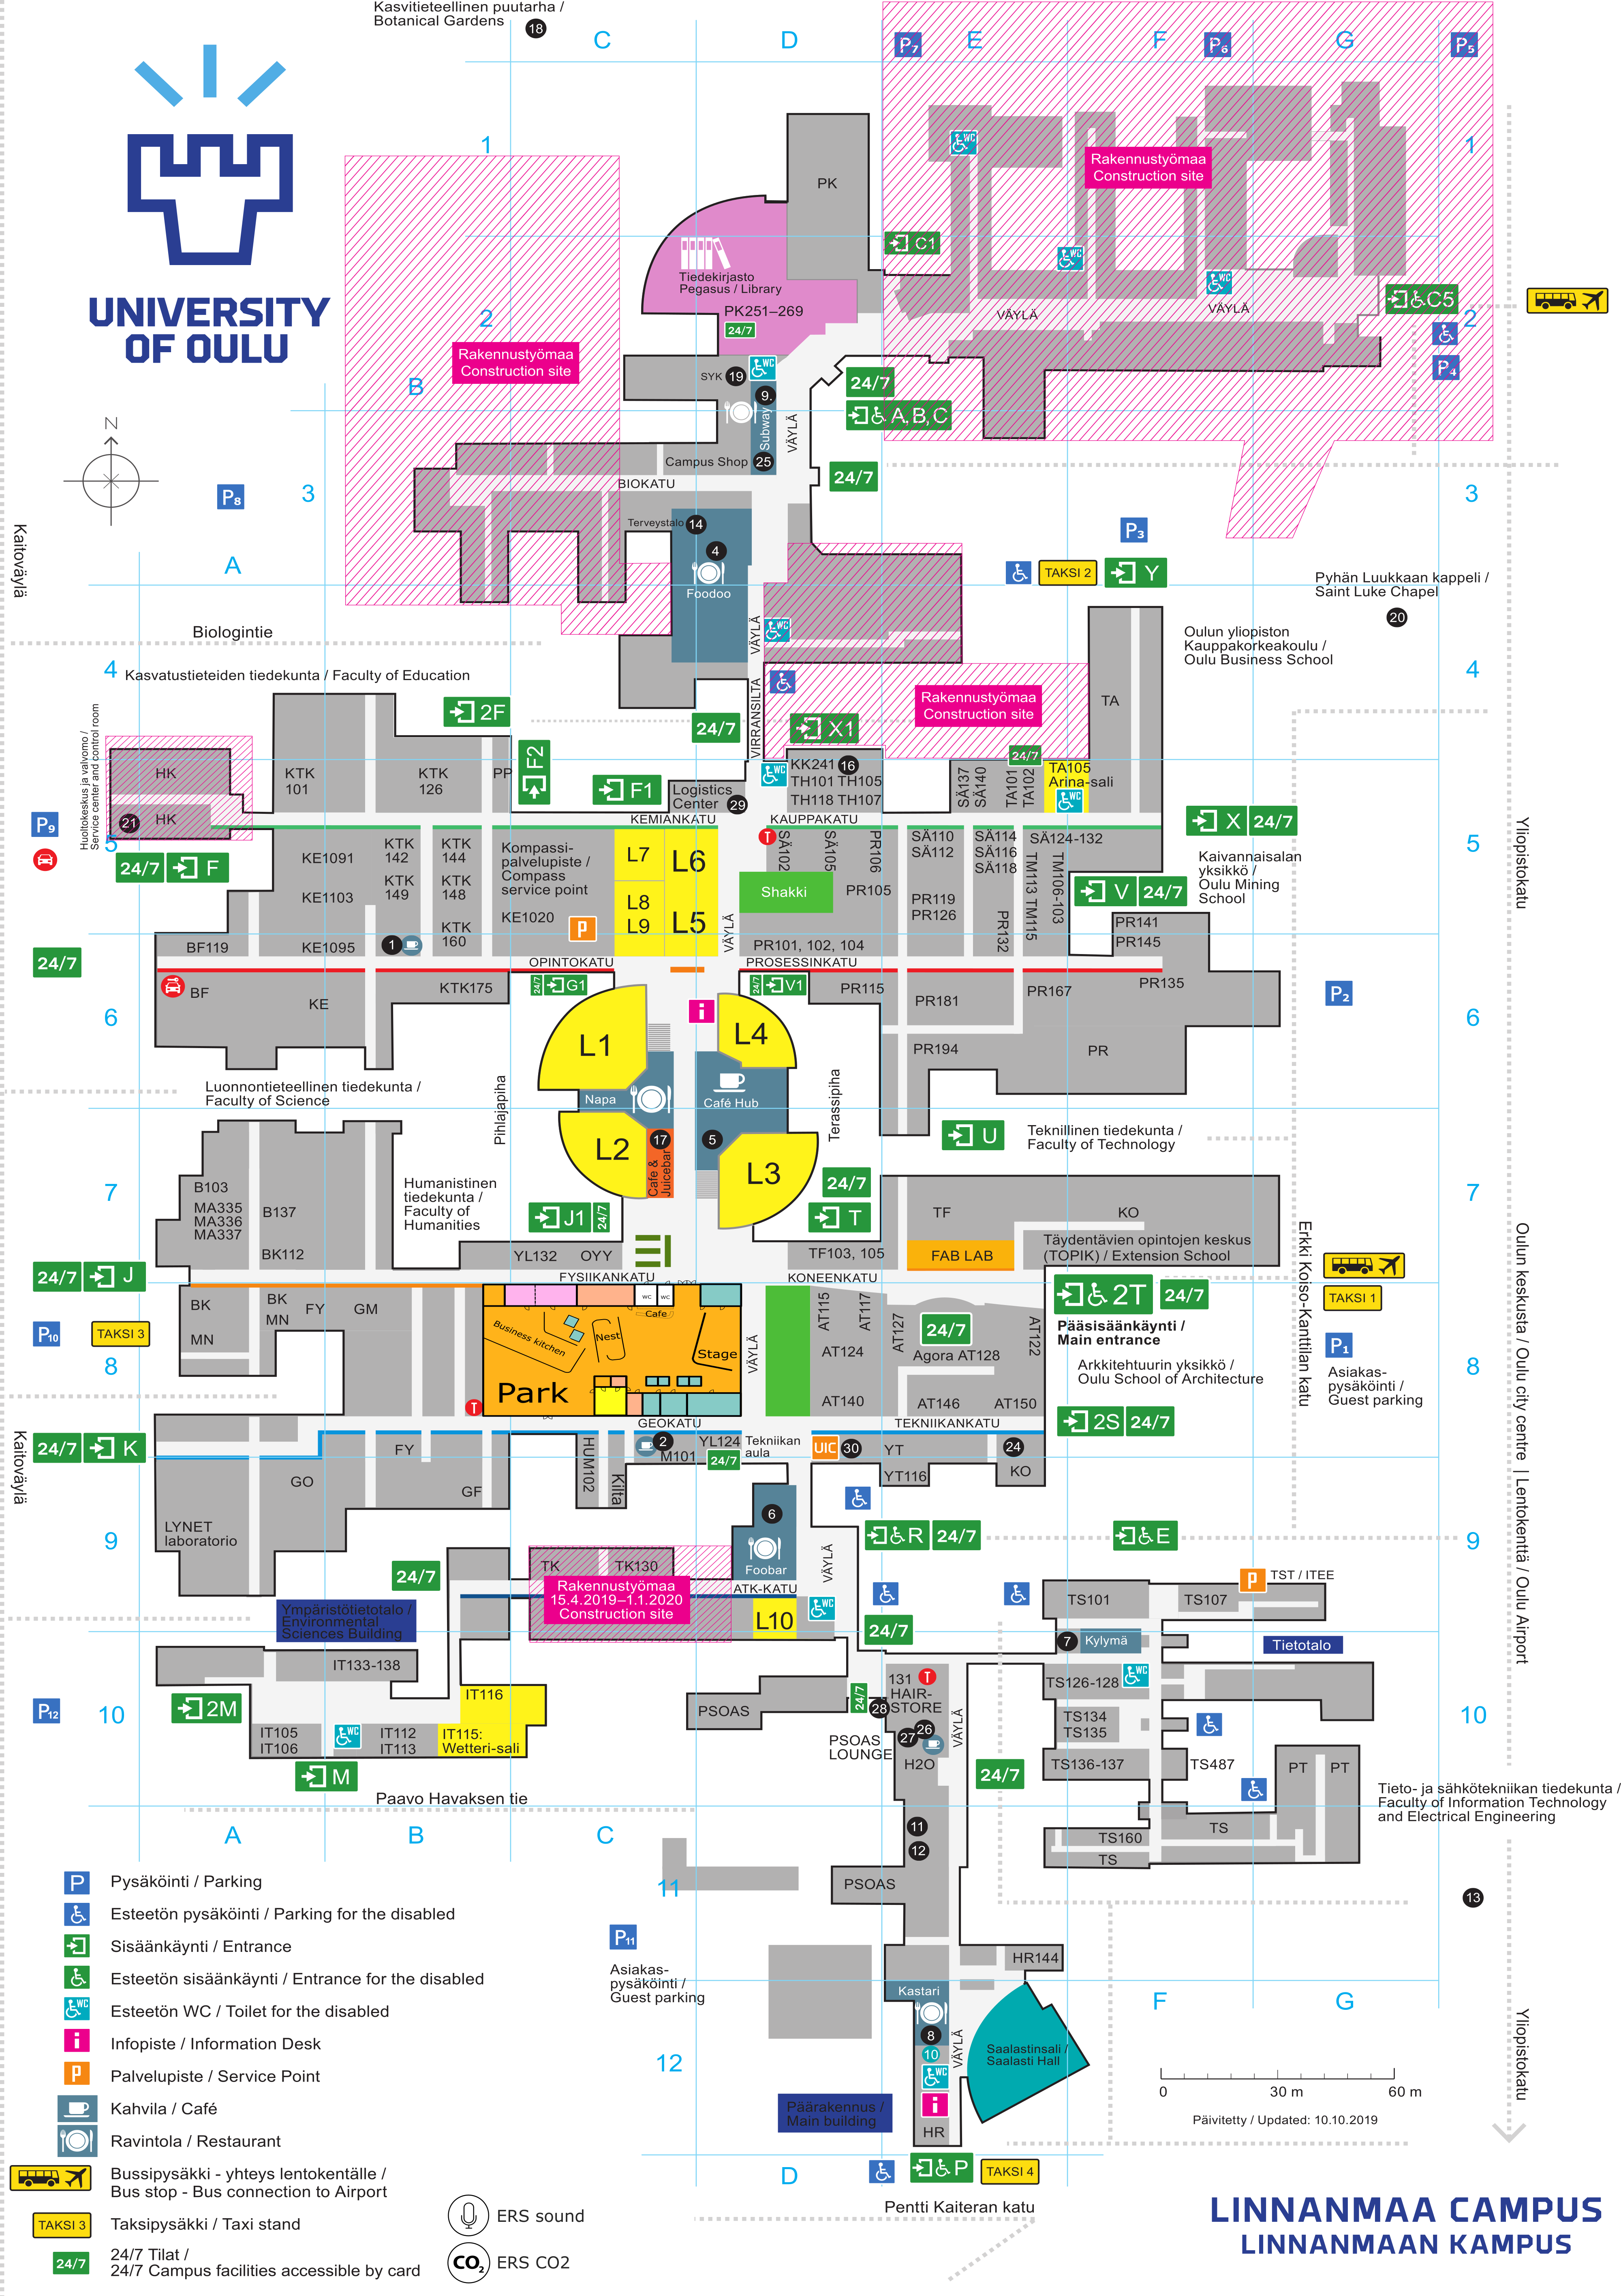

In [20]:
#Movement heat map
m = folium.Map([65.06, 25.467], zoom_start=14.5)

folium.raster_layers.ImageOverlay(
    image="./img/university_map.png",
    name="university map",
    bounds=[[65.062044, 25.462502], [65.056337, 25.471510]],
    opacity=1,
    interactive=False,
    cross_origin=False,
    zindex=1).add_to(m)

# Plot it on the map
#HeatMap(heatmap).add_to(m)

HeatMap(heatmap).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

# Display the map
m 
